In [62]:
import numpy as np
import gym
import random
import time

from IPython.display import clear_output
import matplotlib.pyplot as plt

In [63]:
env = gym.make("FrozenLake-v0")

In [64]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))

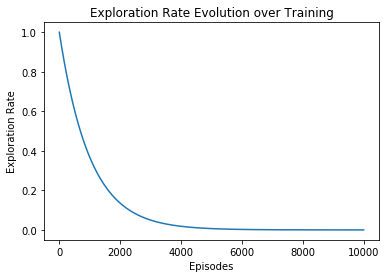

In [98]:
# Fix our Hyper Parameter
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.15
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.0001
exploration_decay_rate = 0.001

# Print the exploration rate
def get_exploration_rate(episode):
    return min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)

x = list(range(num_episodes))
y = list(map(get_exploration_rate, x))
plt.plot(x,y)
plt.xlabel('Episodes')
plt.ylabel('Exploration Rate')
plt.title('Exploration Rate Evolution over Training')
plt.show()
    

In [99]:
rewards_all_episodes = []

# Q-learning algorithm
for episode in range(num_episodes):
    # initialize new episode params
    state = env.reset()
    done = False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode): 
        # Exploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:]) 
        else:
            action = env.action_space.sample()
        # Take new action
        new_state, reward, done, info = env.step(action)
        # Update Q-table
        q_table[state, action] = (
            q_table[state, action] * (1 - learning_rate) + 
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        )
        # Set new state
        state = new_state
        # Add new reward      
        rewards_current_episode += reward
        
        if done == True: 
            break

    # Exploration rate decay
    exploration_rate = (
        min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)  
    )
    
    # Add current episode reward to total rewards list
    rewards_all_episodes.append(rewards_current_episode)

In [100]:
# Calculate and print the average reward per thousand episodes
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thosand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

********Average reward per thousand episodes********

1000 :  0.04500000000000003
2000 :  0.20000000000000015
3000 :  0.43200000000000033
4000 :  0.6090000000000004
5000 :  0.6620000000000005
6000 :  0.6860000000000005
7000 :  0.7090000000000005
8000 :  0.7400000000000005
9000 :  0.7340000000000005
10000 :  0.7510000000000006


In [43]:
# Watch our agent play Frozen Lake by playing the best action 
# from each state according to the Q-table

for episode in range(3):
    # initialize new episode params
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)

    for step in range(max_steps_per_episode):        
        # Show current state of environment on screen        
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        # Choose action with highest Q-value for current state
        action = np.argmax(q_table[state,:])  
        # Take new action        
        new_state, reward, done, info = env.step(action)  
        
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                # Agent reached the goal and won episode
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                # Agent stepped in a hole and lost episode  
                print("****You fell through a hole!****")
                time.sleep(3)
                clear_output(wait=True)
            break
            
        # Set new state
        state = new_state
        
env.close()

  (Down)
SFFF
FHFH
FFFH
HFFG
****You reached the goal!****
